<a href="https://colab.research.google.com/github/aimanhaziqmy/Data-analytics-sample-covid/blob/main/Past_data_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Past dataset COVID19
Contain 19000 rows but are reduced, analyze and testing purpose.

In [1]:
import pandas as pd

In [7]:
data = pd.read_csv("/content/covid19.csv")

## Analyse the Dataframe

In [8]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [5]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [6]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [15]:
data.describe().loc[['mean','std','min','max']]

,Confirmed,Deaths,Recovered
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
max,299691.000000,27682.000000,132929.000000


## Data visualisation

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


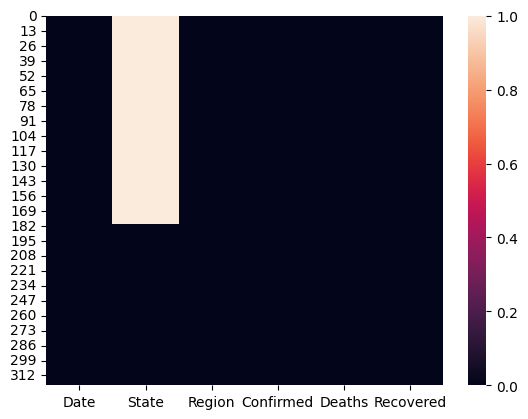

In [17]:
sns.heatmap(data.isnull())
plt.show()

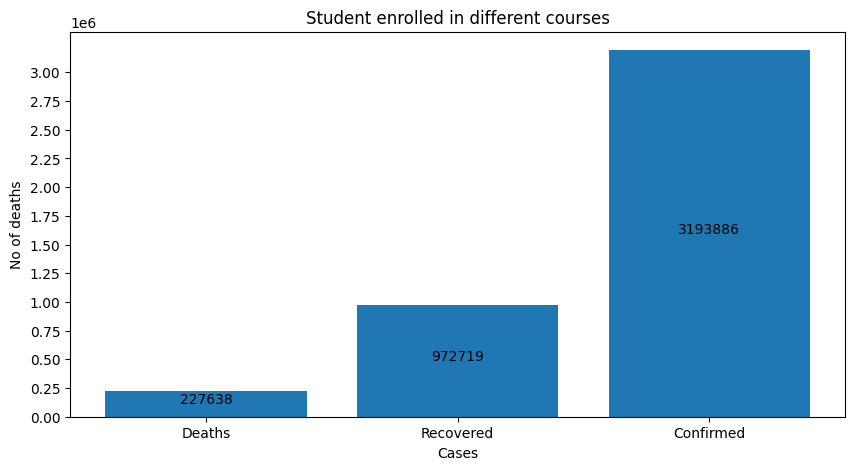

In [49]:
fig = plt.figure(figsize=(10,5))

def addLabels(x,y):
  for i in range(len(x)):
    plt.text(i, y[i]//2 ,y[i], ha="center")

#sum the death and recovered
deaths = data['Deaths'].sum()
recovered = data['Recovered'].sum()
confirmed = data['Confirmed'].sum()
fig_data = { "Deaths" : deaths, "Recovered" : recovered, "Confirmed" : confirmed}
title = list(fig_data.keys())
values = list(fig_data.values())

plt.bar(title, values)

# Add labels on top
addLabels(title,values)

plt.xlabel("Cases")
plt.ylabel("No of deaths")
plt.title("Student enrolled in different courses")
plt.yticks(np.arange(0, max(values)+1, 250000))
plt.show()

## Question 1 Show the number of confirmed, Deaths and Recovered cases in each region

In [37]:
data.groupby("Region").sum().head(10)

<ipython-input-37-abe323754055>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Region").sum().head(10)


,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [39]:
data.groupby("Region")["Confirmed"].sum().head()

Region
Afghanistan    1939
Albania         766
Algeria        3848
Andorra         743
Angola           27
Name: Confirmed, dtype: int64

In [42]:
data.groupby("Region")['Confirmed'].sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

In [44]:
data.groupby("Region")['Confirmed','Recovered'].sum()

<ipython-input-44-3d5ccc00efeb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("Region")['Confirmed','Recovered'].sum()


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7
...,...,...
West Bank and Gaza,344,71
Western Sahara,6,5
Yemen,6,1


## Question 2 : Remove all the records where confirmed cases is less than 10

In [54]:
 data = data[~data.Confirmed < 10]

In [55]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


## Question 3: In which region, maximum number cases were recorded

In [60]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

## Question 4: In which Region, minimum number of cases were recorded



In [61]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=True).head()

Region
Yemen                    6
Western Sahara           6
Bhutan                   7
Papua New Guinea         8
Sao Tome and Principe    8
Name: Confirmed, dtype: int64

## Question 5: How many confirmed, deaths and recovered recorded in Malaysia

In [62]:
data[data['Region'] == "Malaysia"]

,Date,State,Region,Confirmed,Deaths,Recovered
101,4/29/2020,NaN,Malaysia,5945,100,4087


## Question 6 : Sort the entire data with no of confirmed cases in ascending order.

In [64]:
data.sort_values(by=['Confirmed'], ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered
285,4/29/2020,Recovered,US,0,0,120720
284,4/29/2020,Recovered,Canada,0,0,20327
203,4/29/2020,Diamond Princess cruise ship,Canada,0,1,0
305,4/29/2020,Tibet,Mainland China,1,0,1
289,4/29/2020,Saint Pierre and Miquelon,France,1,0,0
...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228
168,4/29/2020,NaN,UK,165221,26097,0
80,4/29/2020,NaN,Italy,203591,27682,71252
153,4/29/2020,NaN,Spain,236899,24275,132929
